# Weather project

In [8]:
#install packages
import numpy as np
import matplotlib.pyplot as pp
import seaborn

#keep plots inline
%matplotlib inline

In [41]:
#download a file using FTP
import urllib.request as ur
ur.urlretrieve('ftp://ftp.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt',
                'stations.txt')

('stations.txt', <email.message.Message at 0x1101267b8>)

In [40]:
#preview the data
open('stations.txt','r').readlines()[:10]

['ACW00011604  17.1167  -61.7833   10.1    ST JOHNS COOLIDGE FLD                       \n',
 'ACW00011647  17.1333  -61.7833   19.2    ST JOHNS                                    \n',
 'AE000041196  25.3330   55.5170   34.0    SHARJAH INTER. AIRP            GSN     41196\n',
 'AEM00041194  25.2550   55.3640   10.4    DUBAI INTL                             41194\n',
 'AEM00041217  24.4330   54.6510   26.8    ABU DHABI INTL                         41217\n',
 'AEM00041218  24.2620   55.6090  264.9    AL AIN INTL                            41218\n',
 'AF000040930  35.3170   69.0170 3366.0    NORTH-SALANG                   GSN     40930\n',
 'AFM00040938  34.2100   62.2280  977.2    HERAT                                  40938\n',
 'AFM00040948  34.5660   69.2120 1791.3    KABUL INTL                             40948\n',
 'AFM00040990  31.5000   65.8500 1010.0    KANDAHAR AIRPORT                       40990\n']

In [38]:
#collect stations in a dict
stations = {}
for line in open('stations.txt','r'):
    if 'GSN' in line:
        fields = line.split()
        stations[fields[0]] =  ' '.join(fields[4:])
print('There are %d stations' %len(stations))

There are 997 stations


In [14]:
#there is a lot so let's look for interesting patterns
def find_station(s):
    found = {code: name for code, name in stations.items() if s in name}
    return found

In [16]:
find_station('LIHUE')

{'USW00022536': 'HI LIHUE WSO AP 1020.1 GSN 91165'}

In [21]:
find_station('SAN DIEGO')

{'USW00023188': 'CA SAN DIEGO LINDBERGH FLD GSN 72290'}

In [22]:
find_station('MINNEAPOLIS')

{'USW00014922': 'MN MINNEAPOLIS/ST PAUL AP GSN HCN 72658'}

In [23]:
find_station('IRKUTSK')

{'RSM00030710': 'IRKUTSK GSN 30710'}

In [5]:
# we will be examining data from these stations throughout the rest of the chapter
station_codes = ['USW00022536', 'USW00023188', 'USW00014922','RSM00030710']

In [2]:
#read the first station's temp data
open('USW00022536.dly','r').readlines()[:10]

['USW00022536195002TMAX  256  0  256  0  256  0  267  0  217  0  228  0  256  0  272  0  256  0  256  0  256  0  244  0  256  0  256  0  244  0  244  0  250  0  256  0  239  0  250  0  256  0  256  0  267  0  261  0  267  0  267  0  261  0  261  0-9999   -9999   -9999   \n',
 'USW00022536195002TMIN  178  0  156  0  161  0  167  0  167  0  167  0  189  0  211  0  206  0  217  0  217  0  211  0  200  0  200  0  206  0  183  0  206  0  206  0  206  0  194  0  206  0  200  0  206  0  200  0  211  0  183  0  172  0  200  0-9999   -9999   -9999   \n',
 'USW00022536195002PRCP    0  0    0  0    0  0    0  0  737  0  406  0   36  0   38  0    0T 0    0T 0    0  0    0T 0   18  0    5  0   10  0   18  0   15  0    5  0    0T 0    0T 0   23  0   10  0    3  0   48  0    0T 0    0T 0    0T 0    5  0-9999   -9999   -9999   \n',
 'USW00022536195002SNOW    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0  0    0

In [4]:
#read relevant lines of readme to understand the data
open('05_02/readme.txt','r').readlines()[98:121]

['------------------------------\n',
 'Variable   Columns   Type\n',
 '------------------------------\n',
 'ID            1-11   Character\n',
 'YEAR         12-15   Integer\n',
 'MONTH        16-17   Integer\n',
 'ELEMENT      18-21   Character\n',
 'VALUE1       22-26   Integer\n',
 'MFLAG1       27-27   Character\n',
 'QFLAG1       28-28   Character\n',
 'SFLAG1       29-29   Character\n',
 'VALUE2       30-34   Integer\n',
 'MFLAG2       35-35   Character\n',
 'QFLAG2       36-36   Character\n',
 'SFLAG2       37-37   Character\n',
 '  .           .          .\n',
 '  .           .          .\n',
 '  .           .          .\n',
 'VALUE31    262-266   Integer\n',
 'MFLAG31    267-267   Character\n',
 'QFLAG31    268-268   Character\n',
 'SFLAG31    269-269   Character\n',
 '------------------------------\n']

In [12]:
def parse_file(fname):
    return np.genfromtxt(fname,
                        delimiter=dly_delimiter,
                        usecols=dly_usecols,
                        dtype=dly_dtype,
                        names=dly_names)

In [13]:
dly_delimiter = [11,4,2,4] + [5,1,1,1] * 31
dly_usecols = [1,2,3] + [4*i for i in range(1,32)]
dly_dtype = [np.int32,np.int32,(np.str_,4)] + [np.int32] * 31
dly_names = ['year','month','obs'] + [str(day) for day in range(1,31+1)]

In [14]:
lihue = parse_file('USW00022536.dly')
lihue

array([ (1950, 2, 'TMAX',   256,   256,   256,   267,   217,   228,   256,   272,   256,   256,   256,   244,   256,   256,   244,   244,   250,   256,   239,   250,   256,   256,   267,   261,   267,   267,   261,   261, -9999, -9999, -9999),
       (1950, 2, 'TMIN',   178,   156,   161,   167,   167,   167,   189,   211,   206,   217,   217,   211,   200,   200,   206,   183,   206,   206,   206,   194,   206,   200,   206,   200,   211,   183,   172,   200, -9999, -9999, -9999),
       (1950, 2, 'PRCP',     0,     0,     0,     0,   737,   406,    36,    38,     0,     0,     0,     0,    18,     5,    10,    18,    15,     5,     0,     0,    23,    10,     3,    48,     0,     0,     0,     5, -9999, -9999, -9999),
       ...,
       (2015, 9, 'WT03', -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999,     1, -9999,     1, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999, -9999),
       (2015, 9

In [15]:
def unroll(record):
    startdate = np.datetime64('{}-{:02}'.format(record['year'],record['month']))
    dates = np.arange(startdate,startdate+np.timedelta64(1,'M'),np.timedelta64(1,'D'))
    
    rows = [(date,record[str(i+1)]/10) for i,date in enumerate(dates)]
    
    return np.array(rows,dtype=[('date','M8[D]'),('value','d')])

In [16]:
unroll(lihue[0])

array([('1950-02-01',  25.6), ('1950-02-02',  25.6), ('1950-02-03',  25.6),
       ('1950-02-04',  26.7), ('1950-02-05',  21.7), ('1950-02-06',  22.8),
       ('1950-02-07',  25.6), ('1950-02-08',  27.2), ('1950-02-09',  25.6),
       ('1950-02-10',  25.6), ('1950-02-11',  25.6), ('1950-02-12',  24.4),
       ('1950-02-13',  25.6), ('1950-02-14',  25.6), ('1950-02-15',  24.4),
       ('1950-02-16',  24.4), ('1950-02-17',  25. ), ('1950-02-18',  25.6),
       ('1950-02-19',  23.9), ('1950-02-20',  25. ), ('1950-02-21',  25.6),
       ('1950-02-22',  25.6), ('1950-02-23',  26.7), ('1950-02-24',  26.1),
       ('1950-02-25',  26.7), ('1950-02-26',  26.7), ('1950-02-27',  26.1),
       ('1950-02-28',  26.1)],
      dtype=[('date', '<M8[D]'), ('value', '<f8')])

In [17]:
def getobs(filename,obs):
    return np.concatenate([unroll(row) for row in parse_file(filename) if row[2] == obs])

In [18]:
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

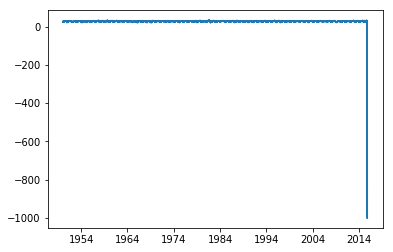

In [19]:
pp.plot(lihue_tmax['date'],lihue_tmax['value'])

In [20]:
#we notice this data is really absurd
def getobs(filename,obs):
    data = np.concatenate([unroll(row) for row in parse_file(filename) if row[2] == obs])
    #apply bool mask
    data['value'][data['value'] == -999.9] = np.nan
    return data

In [21]:
#try it again 
lihue_tmax = getobs('USW00022536.dly','TMAX')
lihue_tmin = getobs('USW00022536.dly','TMIN')

Text(0.5,0,'Date')

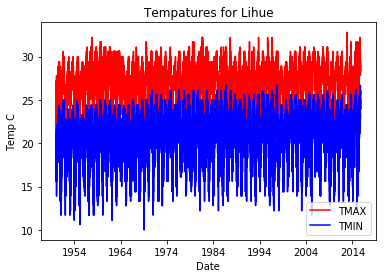

In [22]:
#plotting ignores np.nan data, so if the data is bad set it to nan
p1 = pp.plot(lihue_tmax['date'],lihue_tmax['value'], 'red', label='TMAX')
p2 = pp.plot(lihue_tmin['date'],lihue_tmin['value'], 'blue', label='TMIN')

#add labels
pp.legend()
pp.title('Tempatures for Lihue')
pp.ylabel('Temp C')
pp.xlabel('Date')

In [23]:
np.mean(lihue_tmin['value']),np.mean(lihue_tmax['value'])

(nan, nan)

[0, 8, 0, 12]

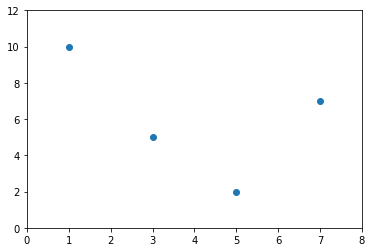

In [24]:
#interpolate the data: filling in missing values with their neighbors

#simple example
x = np.array([1,3,5,7],'d')
y = np.array([10,5,2,7],'d')
pp.plot(x,y,'o')
pp.axis([0,8,0,12])

#to fill in values for say x = 2 draw a line between points

In [25]:
#build interpolation
xs = np.linspace(1,7)
ys = np.interp(xs,x,y)

[0, 8, 0, 12]

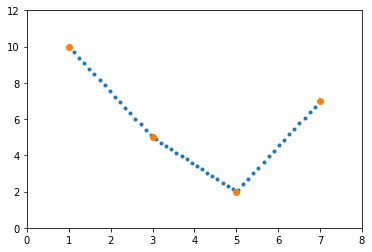

In [26]:
#plot it to see if its good
pp.plot(xs,ys,'.')
pp.plot(x,y,'o')
pp.axis([0,8,0,12])

In [27]:
def interpNums(data):
    #convert dates to floats
    dates_float = data['date'].astype(np.float64)
    
    #find nan values (bad)
    nan = np.isnan(data['value'])
    
    #fill in our missing (bad) values
    data['value'][nan] = np.interp(dates_float[nan],dates_float[~nan],data['value'][~nan])

In [28]:
#interpolate our data
interpNums(lihue_tmax)
interpNums(lihue_tmin)

In [29]:
#find means
print('(low, high)')
np.mean(lihue_tmin['value']), np.mean(lihue_tmax['value'])

(low, high)


(21.051530250594173, 27.300908977192176)

# Its time to smooth our data!!!

In [30]:
#take a running mean 
def plot_smoothed(t, win=10):#bigger window more smoothing
    #running mean for given win
    smoothed = np.correlate(t['value'],np.ones(win)/win,'same')
    
    pp.plot(t['date'],smoothed)

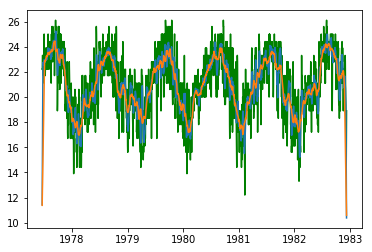

In [31]:
#plot without smoothing
p1 = pp.plot(lihue_tmin['date'][10000:12000],lihue_tmin['value'][10000:12000], 'green', label='TMAX')

plot_smoothed(lihue_tmin[10000:12000])
plot_smoothed(lihue_tmin[10000:12000],30)

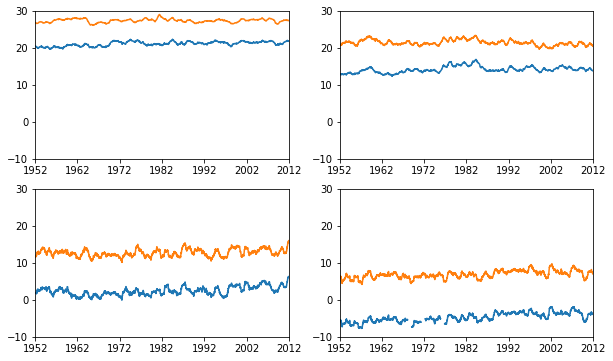

In [44]:
#make plot bigger
pp.figure(figsize=(10,6))

for i,code in enumerate(station_codes):
    pp.subplot(2,2,i+1)
    plot_smoothed(getobs('{}.dly'.format(code),'TMIN'),365)
    plot_smoothed(getobs('{}.dly'.format(code),'TMAX'),365)
    
#     pp.title(stations[code])
    
    pp.axis(xmin=np.datetime64('1952'),xmax=np.datetime64('2012'),ymin=-10,ymax=30)

# Computing daily records

In [47]:
def selectYear(data,year):
        start = np.datetime64('{}'.format(year))
        end = start + np.timedelta64(1,'Y')
        
        return data[(data['date'] >= start) & (data['date'] < end)]['value']

In [48]:
selectYear(lihue_tmin,1951)

array([ 17.8,  17.8,  17.2,  18.3,  20. ,  21.7,  22.2,  21.7,  22.2,
        22.2,  21.7,  21.7,  19.4,  18.9,  18.3,  18.3,  19.4,  20.6,
        16.7,  14.4,  14.4,  17.2,  15. ,  12.8,  14.4,  13.3,  15. ,
        14.4,  17.8,  18.3,  16.7,  16.7,  17.2,  16.7,  17.8,  14.4,
        12.2,  13.3,  13.9,  12.8,  14.4,  14.4,  18.9,  19.4,  20. ,
        18.3,  18.3,  18.9,  20. ,  18.3,  19.4,  13.3,  11.7,  17.8,
        17.2,  17.8,  21.1,  22.2,  20.6,  22.2,  19.4,  20. ,  18.3,
        17.8,  17.8,  17.2,  16.1,  18.9,  18.9,  18.9,  17.8,  16.7,
        15.6,  13.3,  13.9,  15.6,  15.6,  21.7,  20.6,  18.3,  15.6,
        14.4,  17.2,  17.8,  18.9,  20. ,  18.9,  18.3,  18.3,  20.6,
        20. ,  18.9,  18.3,  21.1,  16.7,  21.7,  21.1,  21.7,  17.2,
        16.7,  17.8,  18.3,  16.1,  19.4,  20.6,  18.3,  18.3,  17.2,
        18.9,  21.7,  21.7,  21.7,  21.1,  20.6,  20.6,  20. ,  21.7,
        20. ,  20. ,  19.4,  18.3,  21.7,  22.2,  22.8,  20. ,  19.4,
        17.2,  22.2,

In [55]:
lihue_tmin_all = np.vstack(selectYear(lihue_tmin,year)[:365] for year in range(1951,2014+1))

print(lihue_tmin_all)
print(lihue_tmin_all.shape)

[[ 17.8  17.8  17.2 ...,  20.6  19.4  18.9]
 [ 17.2  19.4  21.7 ...,  21.7  20.6  17.8]
 [ 17.8  18.3  19.4 ...,  13.3  15.   15. ]
 ..., 
 [ 17.8  17.2  17.8 ...,  18.3  18.9  19.4]
 [ 20.   20.   19.4 ...,  19.4  20.   18.3]
 [ 17.8  20.   17.8 ...,  18.9  16.1  14.4]]
(64, 365)


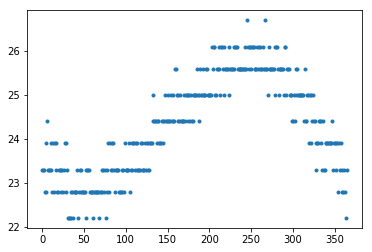

In [56]:
#ready to grab records
lihue_tmin_recordMIN = np.min(lihue_tmin_all,axis=0)
lihue_tmin_recordMAX = np.max(lihue_tmin_all,axis=0)

pp.plot(lihue_tmin_recordMAX,'.')


(-18.25, 365, 8.8599999999999994, 33.939999999999998)

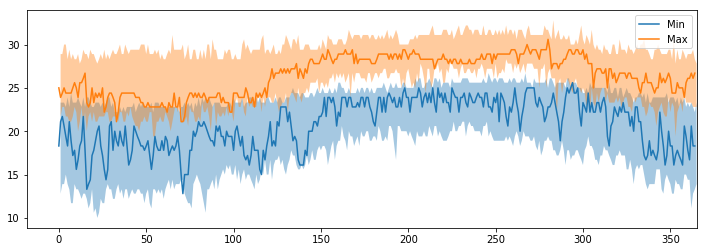

In [63]:
pp.figure(figsize=(12,4))

#do the same for max
lihue_tmax_all = np.vstack(selectYear(lihue_tmax,year)[:365] for year in range(1951,2014+1))

days = np.arange(1,365+1)
pp.fill_between(days,np.min(lihue_tmin_all,axis=0),np.max(lihue_tmin_all,axis=0),alpha=.4)
pp.plot(selectYear(lihue_tmin,2009),label='Min')

pp.fill_between(days,np.min(lihue_tmax_all,axis=0),np.max(lihue_tmax_all,axis=0),alpha=.4)
pp.plot(selectYear(lihue_tmax,2009),label='Max')
pp.legend()
pp.axis(xmax=365)

# class assignment for ATMO
- Thought it would be cool to put here

Text(0.5,0,'Date')

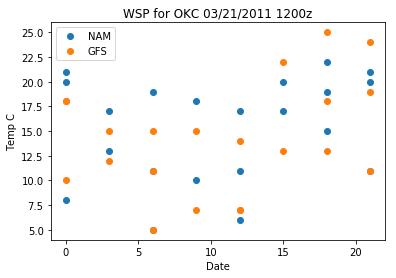

In [87]:
#class assignment
#simple example
nam = np.array([19,20,21,17,19,18,17,20,22,21,20,13,11,10,11,17,15,11,8,5,6],'d')
hrs = np.array([18,21,0,3,6,9,12,15,18,21,0,3,6,9,12,15,18,21,0,6,12])
gfs = np.array([18,19,18,15,15,15,14,22,25,24,18,12,11,7,7,13,13,11,10,5,7],'d')

pp.plot(hrs,nam,'o', label='NAM')
pp.plot(hrs,gfs,'o', label='GFS')
pp.legend()
pp.title('WSP for OKC 03/21/2011 1200z')
pp.ylabel('Temp C')
pp.xlabel('Date')
# pp.axis([0,8,0,12])